# Part 1 -  Data exploration and processing for subsequent segmentation

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

Lets do basic EDA

In [2]:
data = pd.read_csv("/kaggle/input/hw-1-data-analysis-in-business/HW1_var_17.csv", sep = ";")
data.columns

Index(['Номер варианта', 'ID', 'INCOME_BASE_TYPE', 'CREDIT_PURPOSE',
       'INSURANCE_FLAG', 'DTI', 'SEX', 'FULL_AGE_CHILD_NUMBER',
       'DEPENDANT_NUMBER', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE',
       'BANKACCOUNT_FLAG', 'Period_at_work', 'age', 'EMPL_PROPERTY',
       'EMPL_FORM', 'FAMILY_STATUS', 'max90days', 'max60days', 'max30days',
       'max21days', 'max14days', 'avg_num_delay', 'if_zalog',
       'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60',
       'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed',
       'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed',
       'min_MnthAfterLoan', 'max_MnthAfterLoan', 'dlq_exist',
       'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year',
       'thirty_vintage', 'sixty_vintage', 'ninety_vintage'],
      dtype='object')

In [3]:
data = data.drop("Номер варианта", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10242 entries, 0 to 10241
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10242 non-null  int64  
 1   INCOME_BASE_TYPE       10178 non-null  object 
 2   CREDIT_PURPOSE         10242 non-null  object 
 3   INSURANCE_FLAG         10242 non-null  int64  
 4   DTI                    10129 non-null  float64
 5   SEX                    10242 non-null  object 
 6   FULL_AGE_CHILD_NUMBER  10242 non-null  int64  
 7   DEPENDANT_NUMBER       10242 non-null  int64  
 8   EDUCATION              10242 non-null  object 
 9   EMPL_TYPE              10235 non-null  object 
 10  EMPL_SIZE              10132 non-null  object 
 11  BANKACCOUNT_FLAG       7892 non-null   float64
 12  Period_at_work         7892 non-null   float64
 13  age                    7892 non-null   float64
 14  EMPL_PROPERTY          7892 non-null   object 
 15  EM

We can see that a lot of clients have no informations about features 11-42

In [4]:
data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000017,2НДФЛ,Покупка недвижимости/ строительство,1,0.24,женский,0,0,высшее,специалист,>250,0.0,108.0,31.0,Наука,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000037,Поступление зарплаты на счет,Покупка автомобиля,1,0.44,женский,0,0,среднее-специальное,рабочий,>250,0.0,7.0,32.0,Производство,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000057,Поступление зарплаты на счет,Ремонт,1,0.49,мужской,0,0,среднее,вспомогательный персонал,>100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000077,Поступление зарплаты на счет,Покупка автомобиля,1,0.51,мужской,0,0,среднее-специальное,рабочий,>250,1.0,84.0,43.0,Производство,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000097,Поступление зарплаты на счет,Ремонт,0,0.36,женский,0,0,высшее,специалист,>250,0.0,57.0,27.0,Информационные технологии,ООО,холост / не замужем,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,1204757,2НДФЛ,Ремонт,1,0.49,женский,0,0,Высшее/Второе высшее/Ученая степень,рабочий,>=100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10238,1204777,Форма банка (без печати работодателя),Ремонт,1,0.45,женский,0,0,среднее-специальное,вспомогательный персонал,< 50,0.0,34.0,43.0,Наука,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10239,1204797,Поступление зарплаты на счет,Ремонт,1,0.44,женский,0,0,высшее,вспомогательный персонал,>250,0.0,9.0,46.0,Другое,ООО,женат / замужем,5.0,2.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,1.0,1.0,40.0,2.0,1.0,1.0,4.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10240,1204817,Поступление зарплаты на счет,Покупка автомобиля,0,0.07,мужской,1,0,высшее,специалист,>250,0.0,11.0,34.0,Другое,ООО,женат / замужем,4.0,1.0,1.0,1.0,1.0,0.020833,1.0,1.0,1.0,0.0,0.272727,3.0,8.0,94.0,11.0,3.0,1.0,2.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def get_stats(col):
    total = len(data)
    unique = col.nunique(dropna=True)
    zeros = (col == 0).sum()
    empty = col.isna().sum() + col[col.astype(str).str.strip() == ''].shape[0]
    return pd.Series({
        "unique_values": unique,
        "zeros": zeros,
        "zeros_%": zeros / total * 100,
        "empty_values": empty,
        "empty_%": empty / total * 100,
    })

display(data.apply(get_stats).T)

,unique_values,zeros,zeros_%,empty_values,empty_%
ID,10242.0,0.0,0.000000,0.0,0.000000
INCOME_BASE_TYPE,4.0,0.0,0.000000,64.0,0.624878
CREDIT_PURPOSE,10.0,0.0,0.000000,0.0,0.000000
INSURANCE_FLAG,2.0,4001.0,39.064636,0.0,0.000000
DTI,59.0,1.0,0.009764,113.0,1.103300
SEX,2.0,0.0,0.000000,0.0,0.000000
FULL_AGE_CHILD_NUMBER,7.0,6081.0,59.373169,0.0,0.000000
DEPENDANT_NUMBER,4.0,10207.0,99.658270,0.0,0.000000
EDUCATION,9.0,0.0,0.000000,0.0,0.000000
EMPL_TYPE,9.0,0.0,0.000000,7.0,0.068346


lets convert all 1/0 boolean rows to boolean type

In [6]:
for c in data.columns:
    unique_vals = data[c].dropna().unique()
    if set(unique_vals).issubset({0, 1}):
        data[c] = data[c].astype('boolean')

we have > 60% of data with missing values for 28 features. lets remove these rows because missing features are mostly categorical and we cannot fill them

In [7]:
data = data.dropna(subset=["if_zalog"])
display(data.apply(get_stats).T)

,unique_values,zeros,zeros_%,empty_values,empty_%
ID,3706.0,0.0,0.000000,0.0,0.000000
INCOME_BASE_TYPE,4.0,0.0,0.000000,0.0,0.000000
CREDIT_PURPOSE,10.0,0.0,0.000000,0.0,0.000000
INSURANCE_FLAG,2.0,1467.0,39.584458,0.0,0.000000
DTI,58.0,1.0,0.026983,1.0,0.026983
SEX,2.0,0.0,0.000000,0.0,0.000000
FULL_AGE_CHILD_NUMBER,6.0,2239.0,60.415542,0.0,0.000000
DEPENDANT_NUMBER,3.0,3695.0,99.703184,0.0,0.000000
EDUCATION,9.0,0.0,0.000000,0.0,0.000000
EMPL_TYPE,9.0,0.0,0.000000,0.0,0.000000


now we have more clean data with 3706 rows. further I need to fixt max_n_days fields and FAMILY_STATUS, avg_num_delay fields
max_n_days means - how many times person tried to get a loan in the last n days. I can assume that if we dont have such information it means that this number is 0

avg_num_delay is numerical feature and it is an average, so I can replace it with average num across all the data

FAMILI_STATUS is a categorical feature, so lets remove row

we have only one empty DTI now, so lets remove it

In [8]:
data = data.copy()

max_n_days_cols = [col for col in data.columns if col.startswith("max") and col.endswith("days")]
data.loc[:, max_n_days_cols] = data.loc[:, max_n_days_cols].fillna(0)

data.loc[:, "avg_num_delay"] = data["avg_num_delay"].fillna(data["avg_num_delay"].mean())

data = data.dropna(subset=["FAMILY_STATUS", "DTI"]).reset_index(drop=True)
display(data.apply(get_stats).T)

,unique_values,zeros,zeros_%,empty_values,empty_%
ID,3704.0,0.0,0.000000,0.0,0.0
INCOME_BASE_TYPE,4.0,0.0,0.000000,0.0,0.0
CREDIT_PURPOSE,10.0,0.0,0.000000,0.0,0.0
INSURANCE_FLAG,2.0,1465.0,39.551836,0.0,0.0
DTI,58.0,1.0,0.026998,0.0,0.0
SEX,2.0,0.0,0.000000,0.0,0.0
FULL_AGE_CHILD_NUMBER,6.0,2238.0,60.421166,0.0,0.0
DEPENDANT_NUMBER,3.0,3693.0,99.703024,0.0,0.0
EDUCATION,9.0,0.0,0.000000,0.0,0.0
EMPL_TYPE,9.0,0.0,0.000000,0.0,0.0


we can see that almost all DEPENDANT_NUMBER are zeros, and its quite useless information for analysis, so lets remove it

In [9]:
def get_numeric_stats(col):
    if pd.api.types.is_numeric_dtype(col):
        return pd.Series({
            "mean": col.mean(),
            "median": col.median(),
            "std": col.std(),
            "min": col.min(),
            "max": col.max(),
            "dtype": col.dtype
        })
    else:
        return pd.Series({
            "mean": None,
            "median": None,
            "std": None,
            "min": None,
            "max": None,
            "dtype": col.dtype
        })

stats = data.apply(get_numeric_stats).T
stats["dtype_str"] = stats["dtype"].astype(str)
stats_sorted = stats.sort_values("dtype_str")
display(stats_sorted.drop(columns="dtype_str"))


,mean,median,std,min,max,dtype
ninety_vintage,0.014579,0.0,0.119876,False,True,boolean
if_zalog,0.326674,0.0,0.46906,False,True,boolean
dlq_exist,0.574514,1.0,0.494483,False,True,boolean
thirty_in_a_year,0.149568,0.0,0.356696,False,True,boolean
sixty_vintage,0.014849,0.0,0.120964,False,True,boolean
INSURANCE_FLAG,0.604482,1.0,0.489028,False,True,boolean
ninety_in_a_year,0.063175,0.0,0.24331,False,True,boolean
thirty_vintage,0.030778,0.0,0.172738,False,True,boolean
sixty_in_a_year,0.080994,0.0,0.272862,False,True,boolean
num_AccountActive180,0.382559,0.0,0.670128,0.0,6.0,float64


Lets split data: categorical_features for text data and data with no dependance on the number and numerical_features for numeric data or dependance on the number (like for DEPENDANT_NUMBER we have only 3 unique values but number matter)

In [10]:
categorical_features = ['INCOME_BASE_TYPE',
 'CREDIT_PURPOSE',
 'INSURANCE_FLAG',
 'SEX',
 'EDUCATION',
 'EMPL_TYPE',
 'EMPL_SIZE',
 'BANKACCOUNT_FLAG',
 'EMPL_PROPERTY',
 'EMPL_FORM',
 'FAMILY_STATUS',
 'if_zalog',
 'dlq_exist',
 'thirty_in_a_year',
 'sixty_in_a_year',
 'ninety_in_a_year',
 'thirty_vintage',
 'sixty_vintage',
 'ninety_vintage']

numerical_features = [
  "DTI",
  "Period_at_work",
  "age",
  "FULL_AGE_CHILD_NUMBER",
  "max90days",
  "max60days",
  "max30days",
  "max21days",
  "max14days",
  "avg_num_delay",
  "num_AccountActive180",
  "num_AccountActive90",
  "num_AccountActive60",
  "Active_to_All_prc",
  "numAccountActiveAll",
  "numAccountClosed",
  "sum_of_paym_months",
  "all_credits",
  "Active_not_cc",
  "own_closed",
  "min_MnthAfterLoan",
  "max_MnthAfterLoan"
]


lets build a typical customer

In [11]:
data[numerical_features] = data[numerical_features].apply(pd.to_numeric, errors="coerce")

def most_frequent_non_nan(s: pd.Series):
    vc = s.dropna().value_counts()
    if vc.empty:
        return np.nan

    vc = vc.sort_values(ascending=False)
    top_count = vc.iloc[0]
    top_vals = vc[vc == top_count].index
    return sorted(map(str, top_vals))[0] if len(top_vals) > 1 else top_vals[0]


typical = {}

for col in categorical_features:
    typical[col] = most_frequent_non_nan(data[col])


for col in numerical_features:
    med = data[col].median(skipna=True)
    if pd.isna(med):
        typical[col] = np.nan
    else:
    
        typical[col] = float(round(med, 2))


rows = []
for col in categorical_features:
    rows.append({"feature": col, "type": "categorical", "value": typical.get(col, np.nan)})
for col in numerical_features:
    rows.append({"feature": col, "type": "numerical", "value": typical.get(col, np.nan)})

typical_data = pd.DataFrame(rows)

print("Typical client")
print(typical_data.to_string(index=False))

Typical client
              feature        type                        value
     INCOME_BASE_TYPE categorical Поступление зарплаты на счет
       CREDIT_PURPOSE categorical                       Ремонт
       INSURANCE_FLAG categorical                         True
                  SEX categorical                      женский
            EDUCATION categorical                       высшее
            EMPL_TYPE categorical                   специалист
            EMPL_SIZE categorical                         >250
     BANKACCOUNT_FLAG categorical                          0.0
        EMPL_PROPERTY categorical                     Торговля
            EMPL_FORM categorical                          ООО
        FAMILY_STATUS categorical              женат / замужем
             if_zalog categorical                        False
            dlq_exist categorical                         True
     thirty_in_a_year categorical                        False
      sixty_in_a_year categorical       

So typical client is woman with bachelor who wants to make renovation, in large firm and married, age is 34. Mean number of credits is 5

Lets build categorical featuters distribution visualisation

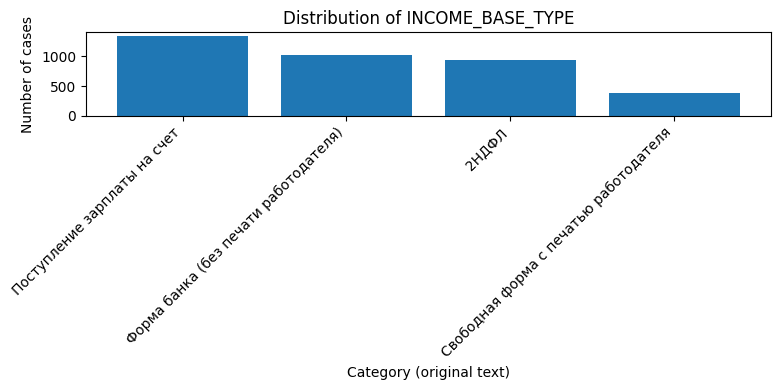

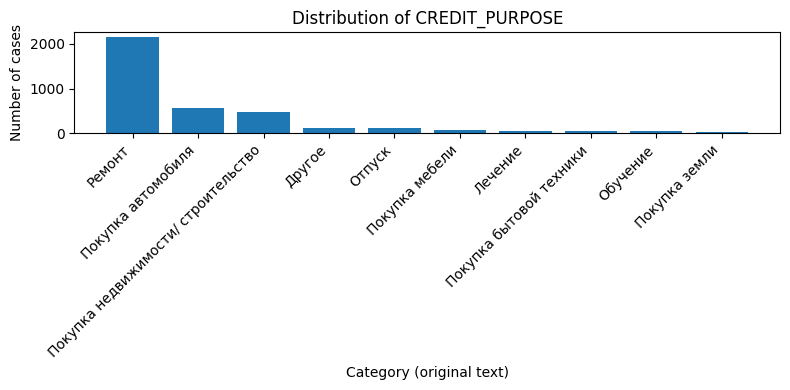

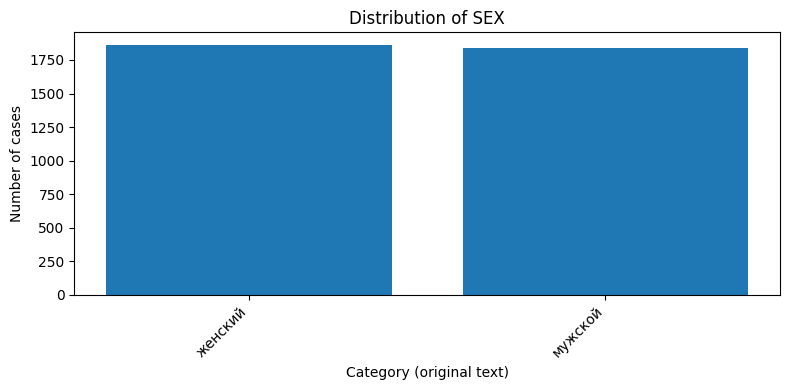

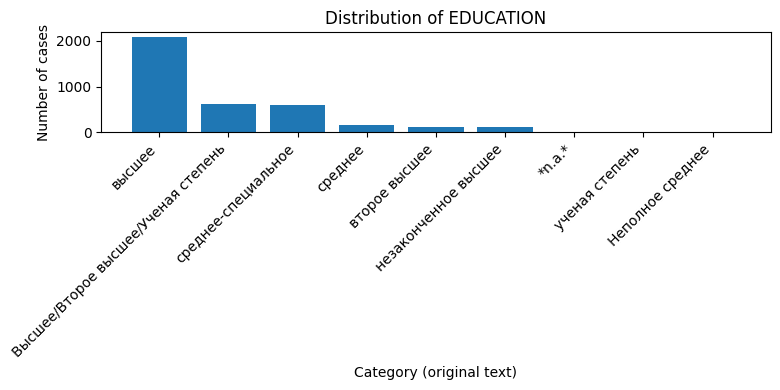

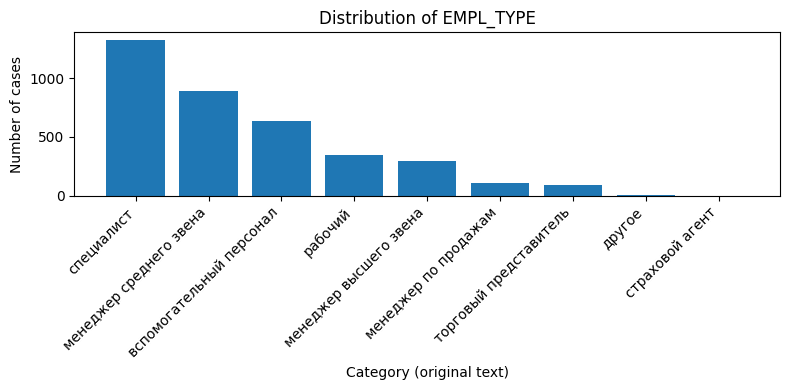

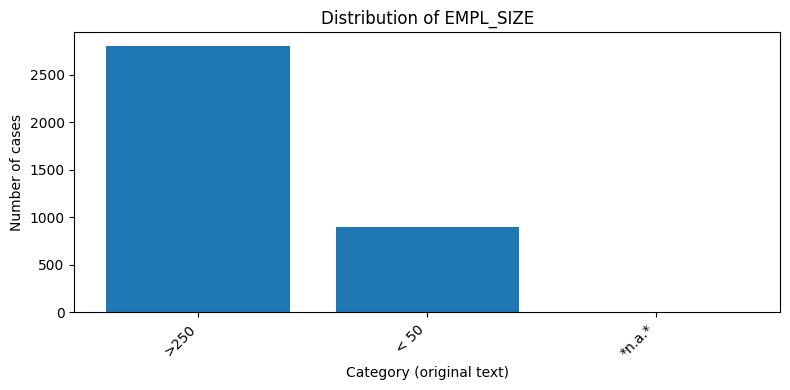

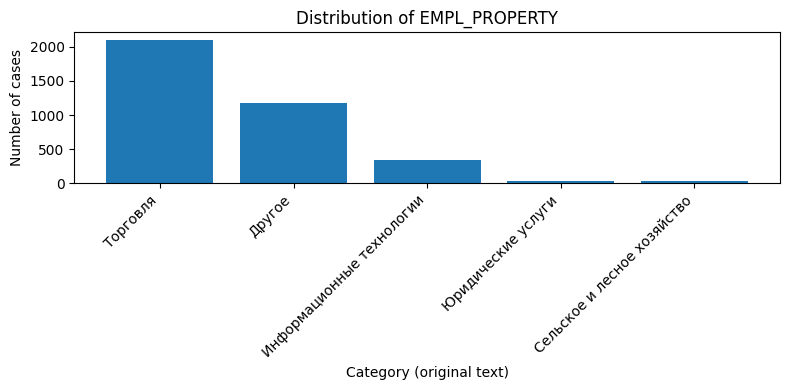

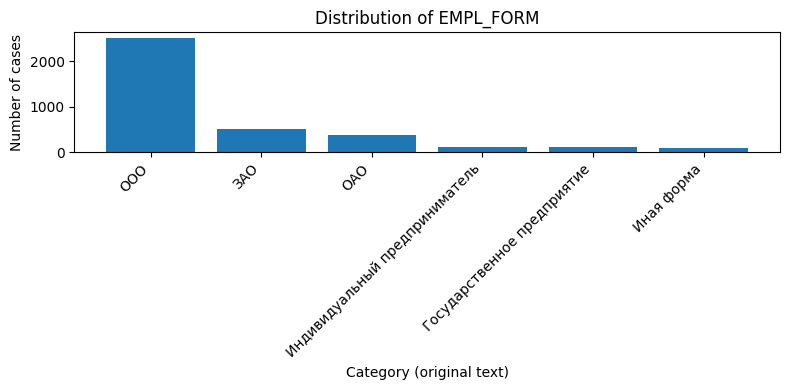

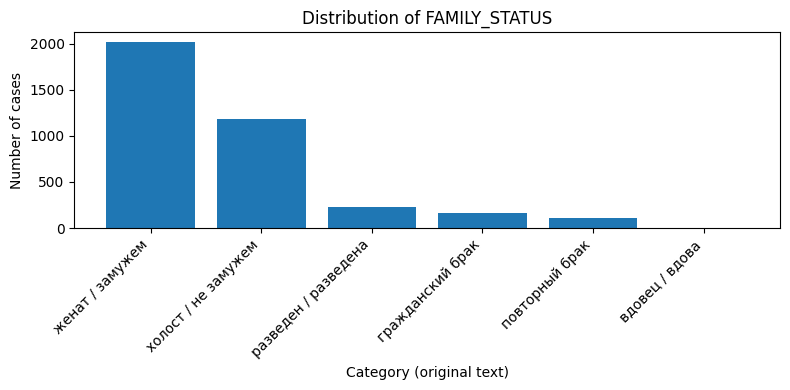

In [12]:
cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    value_counts = data[col].value_counts().sort_values(ascending=False)
    
    plt.figure(figsize=(8, 4))
    plt.bar(value_counts.index.astype(str), value_counts.values)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Category (original text)")
    plt.ylabel("Number of cases")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



Distribution of man and woman is equal. Most of clients have high qualification

Data fix

In [13]:
categorical_features = [c for c in categorical_features if c in data.columns]
numerical_features = [c for c in numerical_features if c in data.columns]

data[numerical_features] = data[numerical_features].apply(pd.to_numeric, errors="coerce")

for c in categorical_features:
    data[c] = data[c].astype("category")

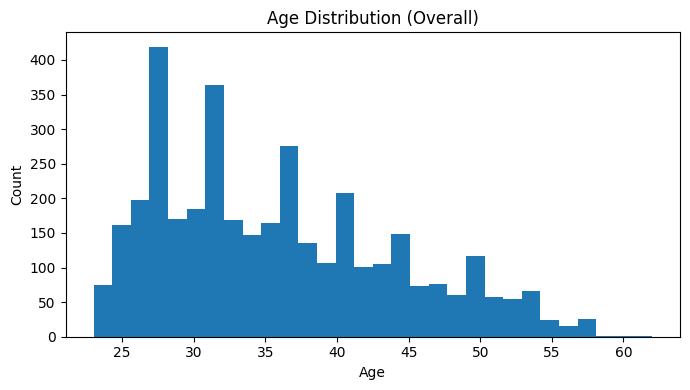

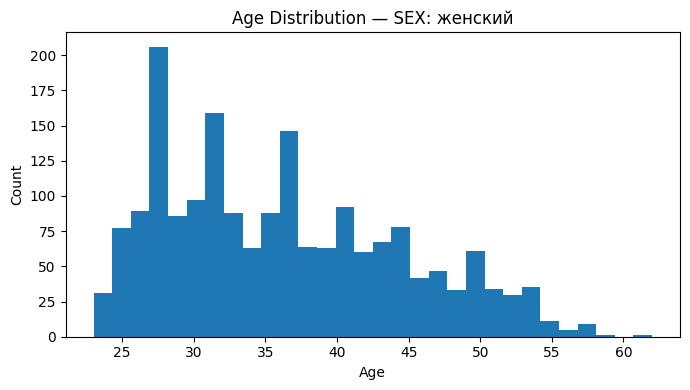

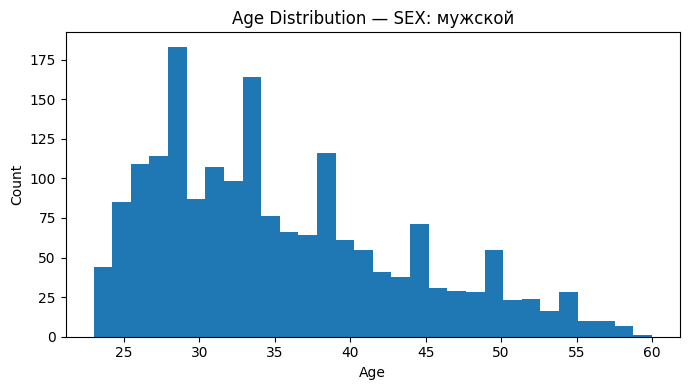

In [14]:
if "age" in data.columns:
    plt.figure(figsize=(7,4))
    data["age"].dropna().sort_values() 
    plt.hist(data["age"].dropna(), bins=30)
    plt.title("Age Distribution (Overall)")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

if "age" in data.columns and "SEX" in data.columns:
    sexes = sorted([s for s in data["SEX"].dropna().unique().tolist()])
    for sx in sexes:
        subset = data.loc[data["SEX"] == sx, "age"].dropna()
        if subset.empty:
            continue
        plt.figure(figsize=(7,4))
        subset_sorted = subset.sort_values()
        plt.hist(subset_sorted, bins=30)
        plt.title(f"Age Distribution — SEX: {sx}")
        plt.xlabel("Age")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()



Lets build numeric distributions

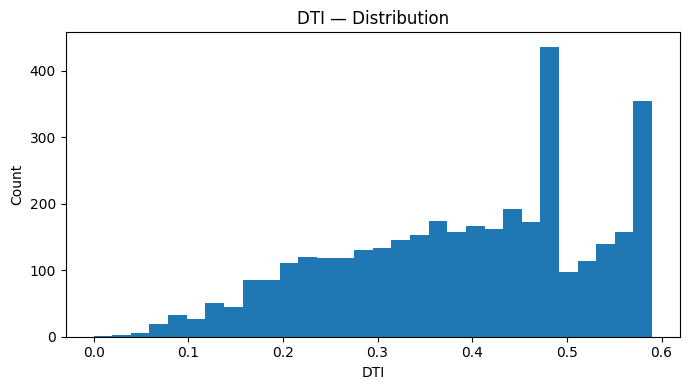

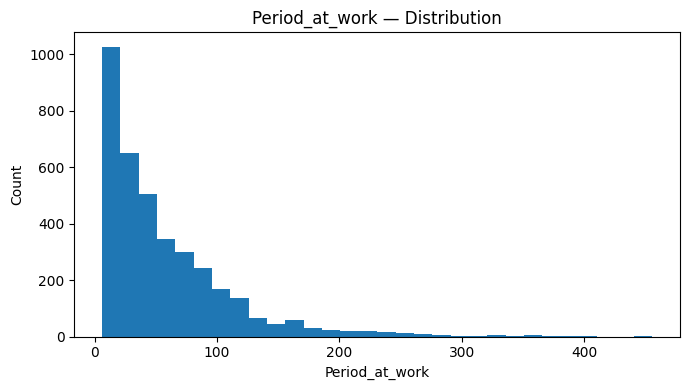

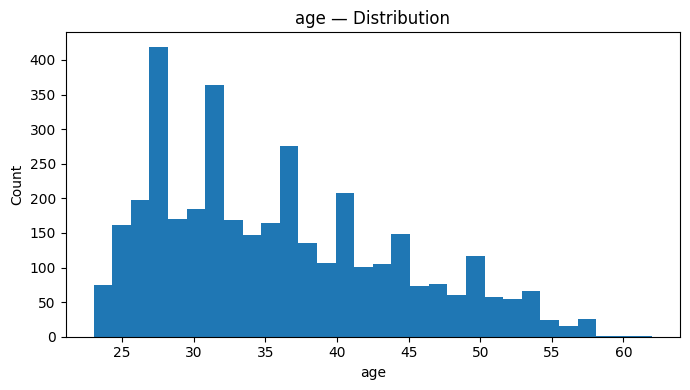

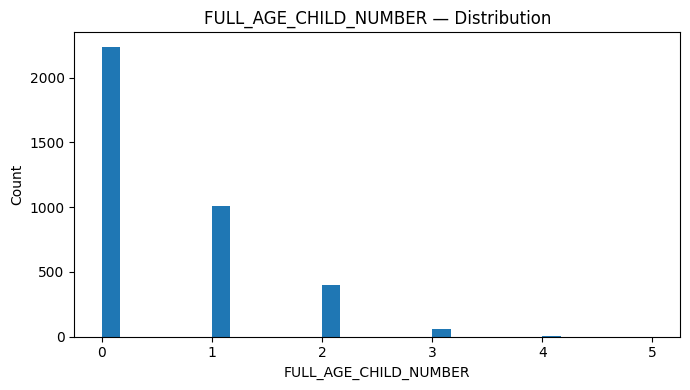

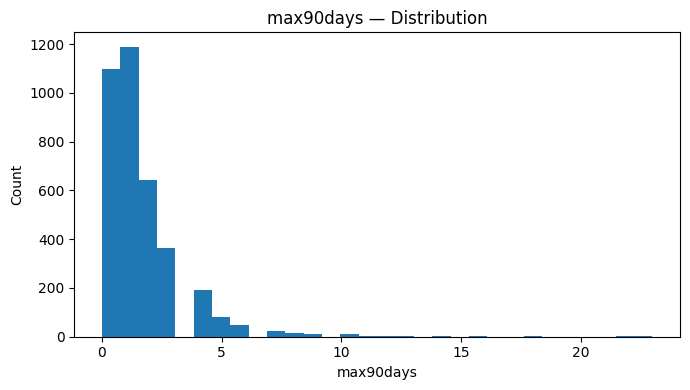

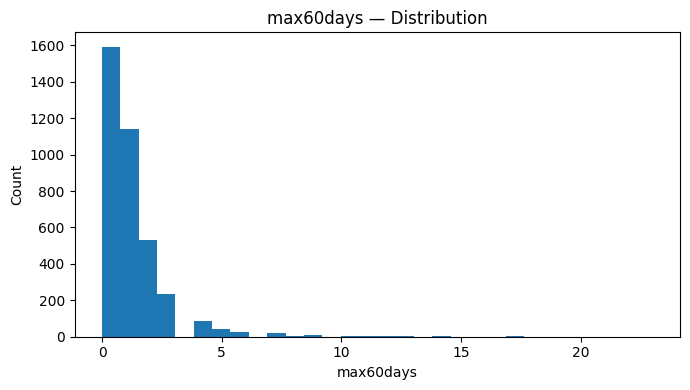

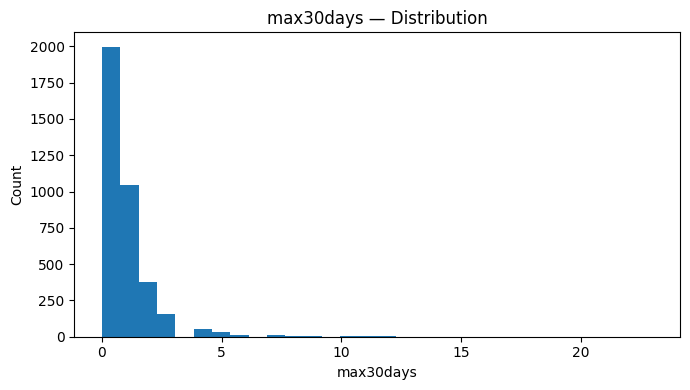

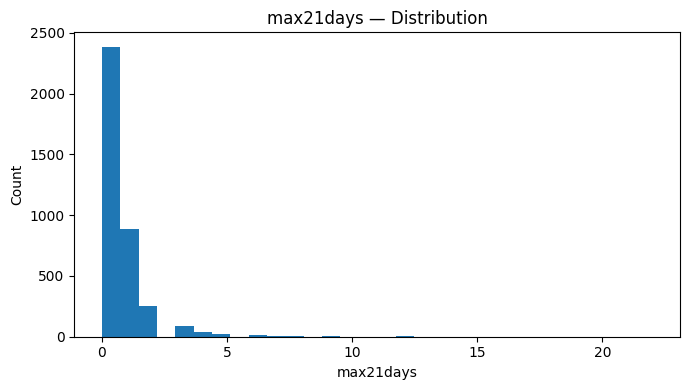

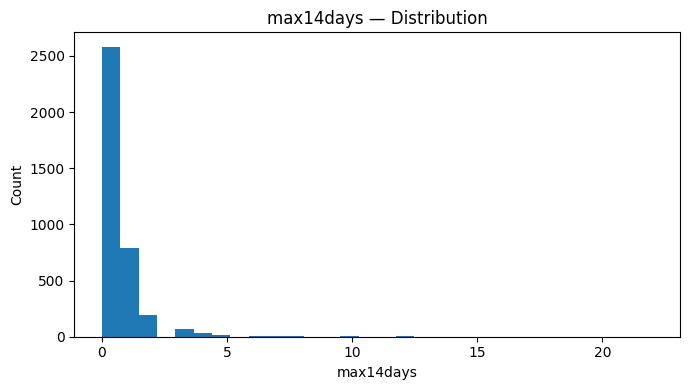

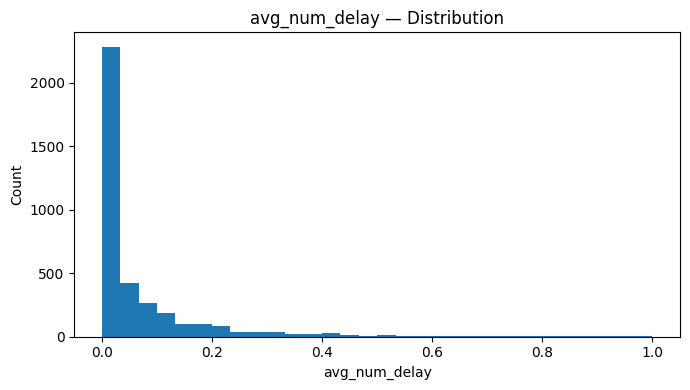

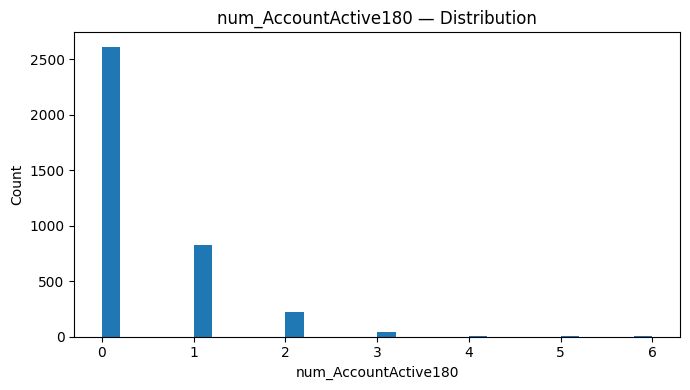

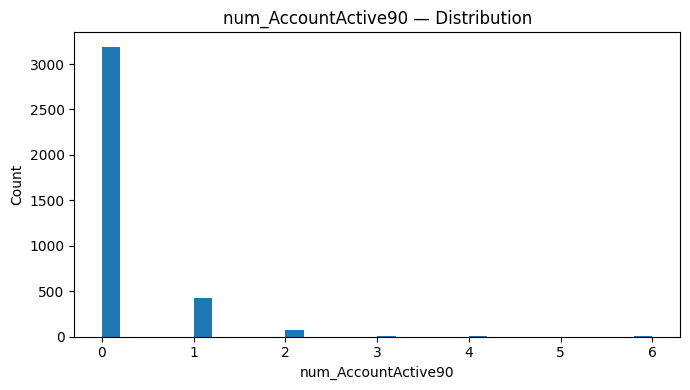

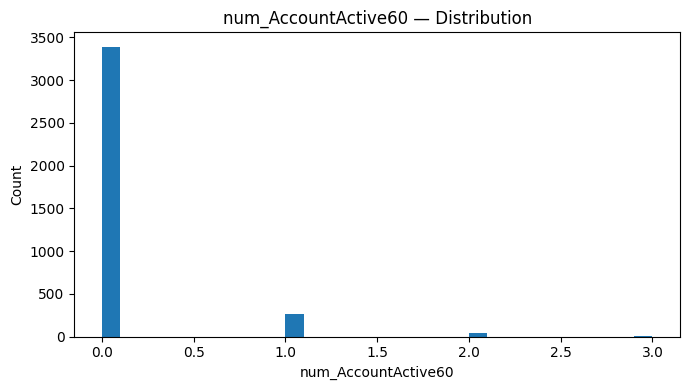

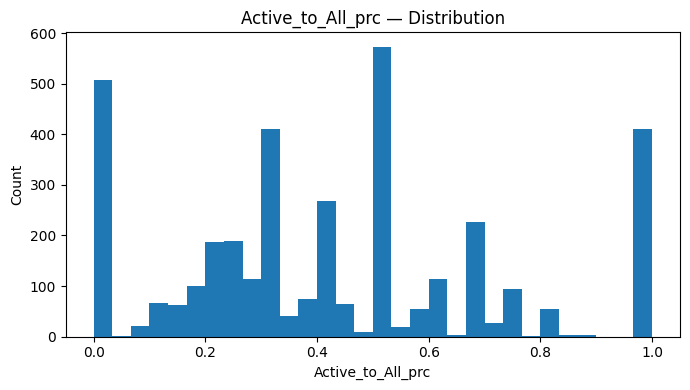

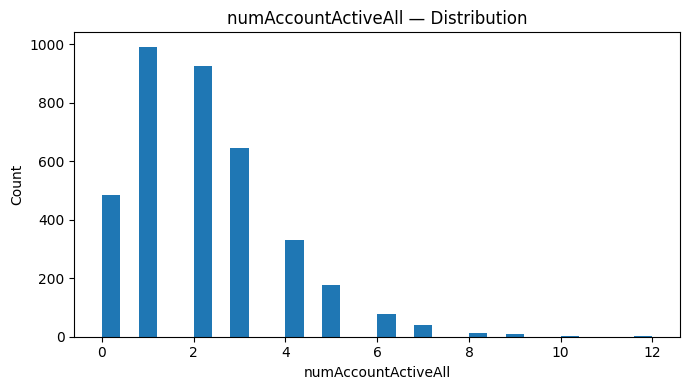

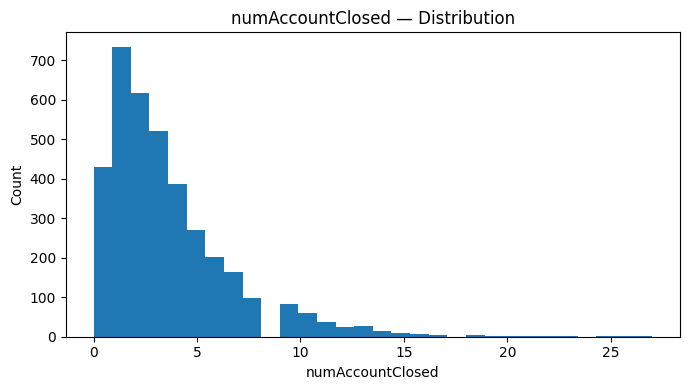

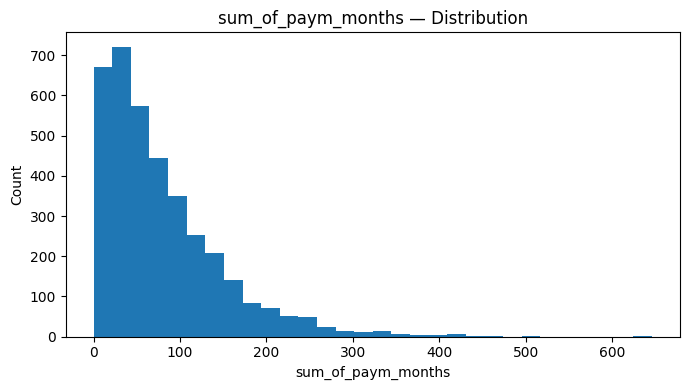

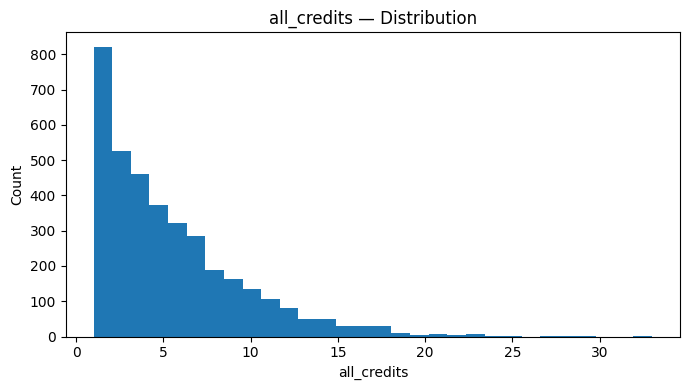

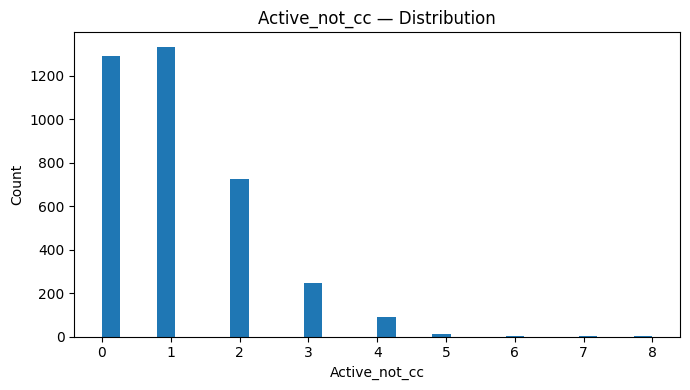

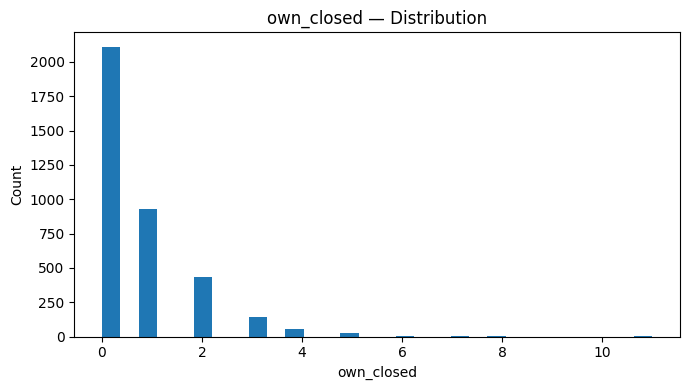

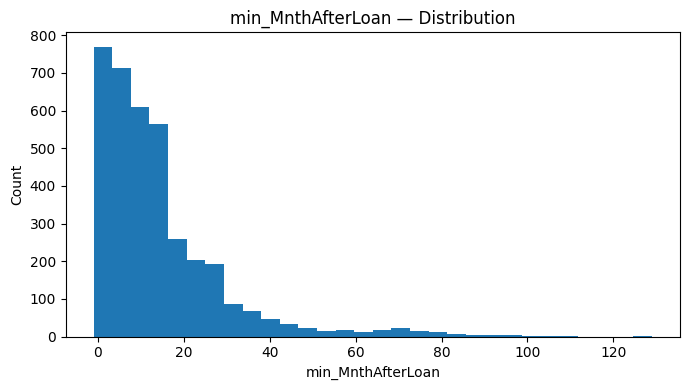

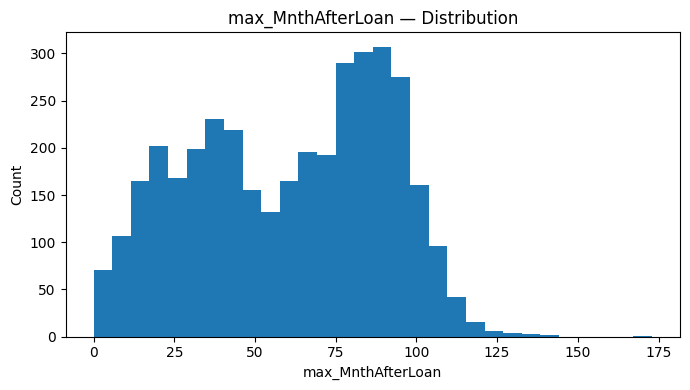

In [15]:
for col in numerical_features:
    series = data[col].dropna()
    if series.empty:
        continue
    plt.figure(figsize=(7,4))
    plt.hist(series.sort_values(), bins=30)
    plt.title(f"{col} — Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


So usually people take loans in a few month after last, or so much after 

And usually clients earn 2 times more than their loan

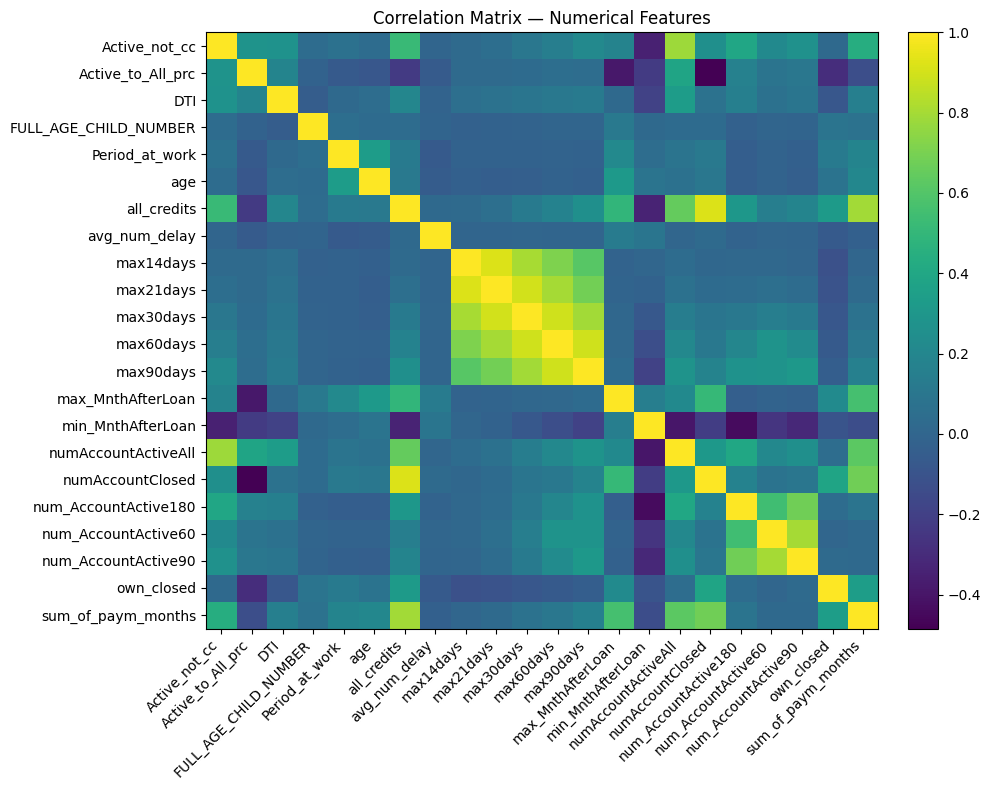

In [16]:
num_data = data[numerical_features].copy()

sorted_cols = sorted(num_data.columns)
num_data = num_data[sorted_cols]

corr = num_data.corr(numeric_only=True)

plt.figure(figsize=(10,8))
im = plt.imshow(corr.values, interpolation='nearest', aspect='auto')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(ticks=np.arange(len(sorted_cols)), labels=sorted_cols, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(sorted_cols)), labels=sorted_cols)
plt.title("Correlation Matrix — Numerical Features")
plt.tight_layout()
plt.show()


Among max_n_days there are a high correlation because they include themselves. Like numAccountClosed correlate with all_credits, they are dependant because of including. 

As last data preparing step lets convert text categorical data to integers and apply one-hot encoding to all categorical features. it will be useful for segmentation

In [17]:
import pandas as pd

data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

print(data.shape)
data.head()

(3704, 80)


,ID,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,INCOME_BASE_TYPE_Поступление зарплаты на счет,INCOME_BASE_TYPE_Свободная форма с печатью работодателя,INCOME_BASE_TYPE_Форма банка (без печати работодателя),CREDIT_PURPOSE_Лечение,CREDIT_PURPOSE_Обучение,CREDIT_PURPOSE_Отпуск,CREDIT_PURPOSE_Покупка автомобиля,CREDIT_PURPOSE_Покупка бытовой техники,CREDIT_PURPOSE_Покупка земли,CREDIT_PURPOSE_Покупка мебели,CREDIT_PURPOSE_Покупка недвижимости/ строительство,CREDIT_PURPOSE_Ремонт,INSURANCE_FLAG_True,SEX_мужской,EDUCATION_Высшее/Второе высшее/Ученая степень,EDUCATION_Неполное среднее,EDUCATION_второе высшее,EDUCATION_высшее,EDUCATION_незаконченное высшее,EDUCATION_среднее,EDUCATION_среднее-специальное,EDUCATION_ученая степень,EMPL_TYPE_другое,EMPL_TYPE_менеджер высшего звена,EMPL_TYPE_менеджер по продажам,EMPL_TYPE_менеджер среднего звена,EMPL_TYPE_рабочий,EMPL_TYPE_специалист,EMPL_TYPE_страховой агент,EMPL_TYPE_торговый представитель,EMPL_SIZE_< 50,EMPL_SIZE_>250,BANKACCOUNT_FLAG_1.0,BANKACCOUNT_FLAG_3.0,EMPL_PROPERTY_Информационные технологии,EMPL_PROPERTY_Сельское и лесное хозяйство,EMPL_PROPERTY_Торговля,EMPL_PROPERTY_Юридические услуги,EMPL_FORM_ЗАО,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем,if_zalog_True,dlq_exist_True,thirty_in_a_year_True,sixty_in_a_year_True,ninety_in_a_year_True,thirty_vintage_True,sixty_vintage_True,ninety_vintage_True
0,1000117,0.49,1,0,91.0,31.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,2.0,2.0,2.0,0.0,0.0,72.0,97.0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False
1,1000157,0.26,0,0,19.0,26.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.000000,0.0,2.0,10.0,2.0,0.0,0.0,12.0,35.0,True,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
2,1000257,0.52,0,0,121.0,57.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.250000,1.0,3.0,71.0,4.0,1.0,0.0,22.0,93.0,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,1000397,0.21,0,0,55.0,26.0,0.0,0.0,0.0,0.0,0.0,0.360000,0.0,0.0,0.0,0.333333,1.0,2.0,32.0,3.0,0.0,1.0,34.0,35.0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False
4,1000437,0.30,3,0,38.0,37.0,9.0,9.0,7.0,5.0,4.0,0.184697,2.0,0.0,0.0,0.461538,6.0,7.0,309.0,13.0,3.0,3.0,5.0,97.0,True,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False

Final data mart

In [18]:
data

,ID,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,INCOME_BASE_TYPE_Поступление зарплаты на счет,INCOME_BASE_TYPE_Свободная форма с печатью работодателя,INCOME_BASE_TYPE_Форма банка (без печати работодателя),CREDIT_PURPOSE_Лечение,CREDIT_PURPOSE_Обучение,CREDIT_PURPOSE_Отпуск,CREDIT_PURPOSE_Покупка автомобиля,CREDIT_PURPOSE_Покупка бытовой техники,CREDIT_PURPOSE_Покупка земли,CREDIT_PURPOSE_Покупка мебели,CREDIT_PURPOSE_Покупка недвижимости/ строительство,CREDIT_PURPOSE_Ремонт,INSURANCE_FLAG_True,SEX_мужской,EDUCATION_Высшее/Второе высшее/Ученая степень,EDUCATION_Неполное среднее,EDUCATION_второе высшее,EDUCATION_высшее,EDUCATION_незаконченное высшее,EDUCATION_среднее,EDUCATION_среднее-специальное,EDUCATION_ученая степень,EMPL_TYPE_другое,EMPL_TYPE_менеджер высшего звена,EMPL_TYPE_менеджер по продажам,EMPL_TYPE_менеджер среднего звена,EMPL_TYPE_рабочий,EMPL_TYPE_специалист,EMPL_TYPE_страховой агент,EMPL_TYPE_торговый представитель,EMPL_SIZE_< 50,EMPL_SIZE_>250,BANKACCOUNT_FLAG_1.0,BANKACCOUNT_FLAG_3.0,EMPL_PROPERTY_Информационные технологии,EMPL_PROPERTY_Сельское и лесное хозяйство,EMPL_PROPERTY_Торговля,EMPL_PROPERTY_Юридические услуги,EMPL_FORM_ЗАО,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем,if_zalog_True,dlq_exist_True,thirty_in_a_year_True,sixty_in_a_year_True,ninety_in_a_year_True,thirty_vintage_True,sixty_vintage_True,ninety_vintage_True
0,1000117,0.49,1,0,91.0,31.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,2.0,2.0,2.0,0.0,0.0,72.0,97.0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False
1,1000157,0.26,0,0,19.0,26.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.000000,0.0,2.0,10.0,2.0,0.0,0.0,12.0,35.0,True,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
2,1000257,0.52,0,0,121.0,57.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.250000,1.0,3.0,71.0,4.0,1.0,0.0,22.0,93.0,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,1000397,0.21,0,0,55.0,26.0,0.0,0.0,0.0,0.0,0.0,0.360000,0.0,0.0,0.0,0.333333,1.0,2.0,32.0,3.0,0.0,1.0,34.0,35.0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False
4,1000437,0.30,3,0,38.0,37.0,9.0,9.0,7.0,5.0,4.0,0.184697,2.0,0.0,0.0,0.461538,6.0,7.0,309.0,13.0,3.0,3.0,5.0,97.0,True,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False

In [19]:
data.describe()

,ID,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan
count,3.704000e+03,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000,3704.000000
mean,1.098594e+06,0.393896,0.536987,0.003240,57.163877,35.785097,1.593413,1.120410,0.820464,0.592873,0.480292,0.063963,0.382559,0.166037,0.100162,0.426130,2.163337,3.465713,79.263229,5.629320,1.078024,0.715443,14.183585,60.582073
std,5.960312e+04,0.135970,0.753591,0.061402,55.080217,8.255685,1.947576,1.643184,1.393012,1.199970,1.049229,0.119527,0.670128,0.453893,0.353158,0.290496,1.654312,3.234955,69.465947,4.060309,1.071877,1.061449,15.343428,30.121238
min,1.000117e+06,0.000000,0.000000,0.000000,6.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000
25%,1.046847e+06,0.290000,0.000000,0.000000,18.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,1.000000,1.000000,29.000000,3.000000,0.000000,0.000000,4.000000,35.000000
50%,1.094207e+06,0.410000,0.000000,0.000000,41.000000,34.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.014851,0.000000,0.000000,0.000000,0.400000,2.000000,3.000000,60.000000,5.000000,1.000000,0.000000,10.000000,65.000000
75%,1.151307e+06,0.490000,1.000000,0.000000,78.000000,41.250000,2.000000,2.000000,1.000000,1.000000,1.000000,0.075259,1.000000,0.000000,0.000000,0.600000,3.000000,5.000000,109.000000,7.000000,2.000000,1.000000,18.000000,86.000000
max,1.204817e+06,0.590000,5.000000,2.000000,456.000000,62.000000,23.000000,23.000000,23.000000,22.000000,22.000000,1.000000,6.000000,6.000000,3.000000,1.000000,12.000000,27.000000,646.000000,33.000000,8.000000,11.000000,129.000000,173.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 80 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ID                                                       3704 non-null   int64  
 1   DTI                                                      3704 non-null   float64
 2   FULL_AGE_CHILD_NUMBER                                    3704 non-null   int64  
 3   DEPENDANT_NUMBER                                         3704 non-null   int64  
 4   Period_at_work                                           3704 non-null   float64
 5   age                                                      3704 non-null   float64
 6   max90days                                                3704 non-null   float64
 7   max60days                                                3704 non-null   float64
 8   max30days                   

So we have 3704 complete customers without empty fields. All categorical data is one-hot encoded. All fields are correct and has type: float or boolean. For segmentation ID is bad because it is an unique identificator, so we wont use it for it. So 78 columns for segmentation. 

# Part 2-3 - Create at least 2 segmentation methods, Conduct an assessment to determine the number of clusters - minimum 5 clusters

In [21]:
data = data.drop("ID", axis=1)

Lets choose 2 methods for segmentation:

Quantiles (RFM) - amount of clusters is controlable, works fast. we have enough data to make high informative model

Classic unsupervised k-means usually give good result, but we need to use a few alghorithms to determine number of clusters.

## K-Means

In [24]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


all_num = [c for c in data.columns if is_numeric_dtype(data[c])]

_base_categorical = [
  "INCOME_BASE_TYPE","CREDIT_PURPOSE","INSURANCE_FLAG","SEX","FULL_AGE_CHILD_NUMBER",
"EDUCATION","EMPL_TYPE","EMPL_SIZE","BANKACCOUNT_FLAG","EMPL_PROPERTY",
  "EMPL_FORM","FAMILY_STATUS","if_zalog","dlq_exist","thirty_in_a_year","sixty_in_a_year",
  "ninety_in_a_year","thirty_vintage","sixty_vintage","ninety_vintage"
]

_base_numerical = [
  "DTI","Period_at_work","age","max90days","max60days","max30days","max21days","max14days",
  "avg_num_delay","num_AccountActive180","num_AccountActive90","num_AccountActive60",
  "Active_to_All_prc","numAccountActiveAll","numAccountClosed","sum_of_paym_months",
  "all_credits","Active_not_cc","min_MnthAfterLoan","max_MnthAfterLoan"
]

categorical_features = sorted([
    col for col in data.columns
    if any(col.startswith(f"{base}_") for base in _base_categorical)
])

numerical_features = [c for c in _base_numerical if c in data.columns]



def is_binary_series(s: pd.Series) -> bool:
    vals = pd.unique(s.dropna())
    return len(vals) <= 2 and set(np.unique(vals)).issubset({0, 1, 0.0, 1.0})

bin_cols = [c for c in all_num if is_binary_series(data[c])]
cont_cols = [c for c in all_num if c not in bin_cols]



#Scale numeric data
if len(cont_cols) > 0:
    Xc = data[cont_cols].copy()
    low = Xc.quantile(0.01)
    high = Xc.quantile(0.99)
    Xc = Xc.clip(lower=low, upper=high, axis=1).fillna(Xc.median())
    scaler = RobustScaler()
    X_cont = scaler.fit_transform(Xc)
else:
    X_cont = np.empty((len(data), 0))


if len(bin_cols) > 0:
    X_bin = data[bin_cols].fillna(0.0).values
else:
    X_bin = np.empty((len(data), 0))

#Final matrix for K-means
X = np.hstack([X_cont, X_bin])

#Different numbers of clusters from 5
k_list = range(5, 11)
results = []
best = {"k": None, "sil": -1, "labels": None, "share_max": 1.0}

for k in k_list:
    km = KMeans(n_clusters=k, n_init=100, random_state=42)
    labels = km.fit_predict(X)

    inertia = km.inertia_
    sil = silhouette_score(X, labels) if X.shape[0] > k else -1
    ch = calinski_harabasz_score(X, labels) if X.shape[0] > k else np.nan
    db = davies_bouldin_score(X, labels) if X.shape[0] > k else np.nan

    vc = pd.Series(labels).value_counts(normalize=True)
    share_max = float(vc.max())

    results.append({
        "k": k, "inertia": inertia, "silhouette": sil,
        "calinski_harabasz": ch, "davies_bouldin": db,
        "max_cluster_share": share_max
    })

    if share_max <= 0.50 and sil > best["sil"]:
        best = {"k": k, "sil": sil, "labels": labels, "share_max": share_max}

if best["k"] is None:
    res_data_tmp = pd.DataFrame(results)
    k_star = int(res_data_tmp.loc[res_data_tmp["silhouette"].idxmax(), "k"])
    km = KMeans(n_clusters=k_star, n_init=100, random_state=42)
    labels = km.fit_predict(X)
    share_max = float(pd.Series(labels).value_counts(normalize=True).max())
    best = {"k": k_star, "sil": float(res_data_tmp["silhouette"].max()),
            "labels": labels, "share_max": share_max}



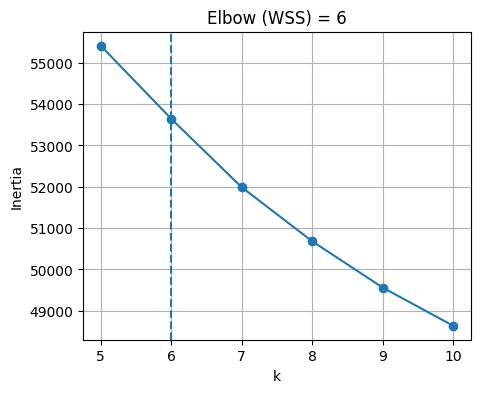

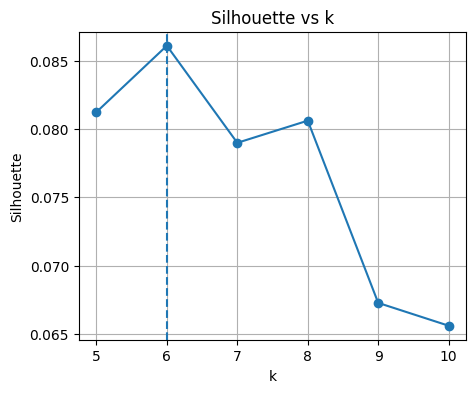

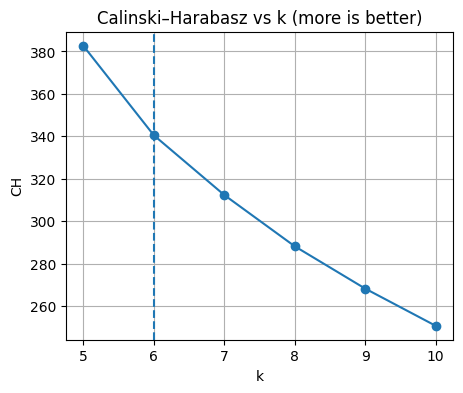

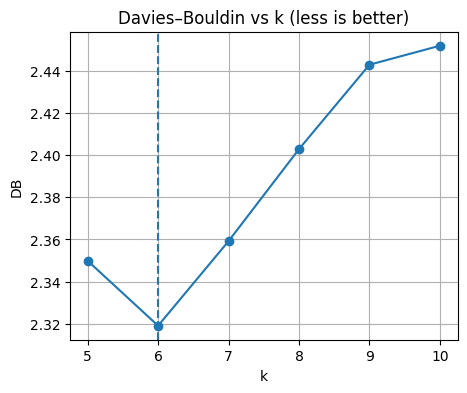

In [25]:
res_data = pd.DataFrame(results)

res_data["share_%_max_cluster"] = (res_data["max_cluster_share"] * 100).round(2)
res_data = res_data[["k","inertia","silhouette","calinski_harabasz","davies_bouldin","share_%_max_cluster"]]


k_best = int(best["k"])

plt.figure(figsize=(5,4))
plt.plot(res_data["k"], res_data["inertia"], marker="o")
plt.axvline(k_best, linestyle="--")
plt.title(f"Elbow (WSS) = {k_best}")
plt.xlabel("k"); plt.ylabel("Inertia")
plt.grid(True)
plt.show()

plt.figure(figsize=(5,4))
plt.plot(res_data["k"], res_data["silhouette"], marker="o")
plt.axvline(k_best, linestyle="--")
plt.title("Silhouette vs k")
plt.xlabel("k"); plt.ylabel("Silhouette")
plt.grid(True)
plt.show()

plt.figure(figsize=(5,4))
plt.plot(res_data["k"], res_data["calinski_harabasz"], marker="o")
plt.axvline(k_best, linestyle="--")
plt.title("Calinski–Harabasz vs k (more is better)")
plt.xlabel("k"); plt.ylabel("CH")
plt.grid(True)
plt.show()

plt.figure(figsize=(5,4))
plt.plot(res_data["k"], res_data["davies_bouldin"], marker="o")
plt.axvline(k_best, linestyle="--")
plt.title("Davies–Bouldin vs k (less is better)")
plt.xlabel("k"); plt.ylabel("DB")
plt.grid(True)
plt.show()


6 clusters wins by silhouette and davies_bouldin metods

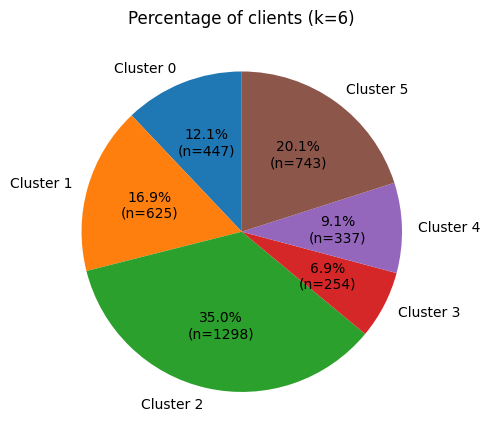

   cluster  count  share_%
0        0    447    12.07
1        1    625    16.87
2        2   1298    35.04
3        3    254     6.86
4        4    337     9.10
5        5    743    20.06


In [28]:
data_km = data.copy()
data_km[f"SEG_KMEANS_{best['k']}"] = best["labels"]
seg_col = f"SEG_KMEANS_{k_best}"
sizes = data_km[seg_col].value_counts().sort_index()
labels = [f"Cluster {i}" for i in sizes.index]
total = sizes.sum()

def autopct_count(pct):
    count = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n(n={count})"

plt.figure(figsize=(5,5))
plt.pie(
    sizes.values,
    labels=labels,
    autopct=autopct_count,
    startangle=90
)
plt.title(f"Percentage of clients (k={k_best})")
plt.tight_layout()
plt.show()

share = (sizes / total * 100).round(2)
cluster_sizes_tbl = pd.DataFrame({"cluster": sizes.index, "count": sizes.values, "share_%": share.values})
print(cluster_sizes_tbl)


All clusters are <50%, lets build UMAP to reduce dimentions and visualise results

In [29]:
#!pip install umap-learn #install and restart kernel

2025-11-06 22:10:29.298507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762467029.550566      77 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762467029.622442      77 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


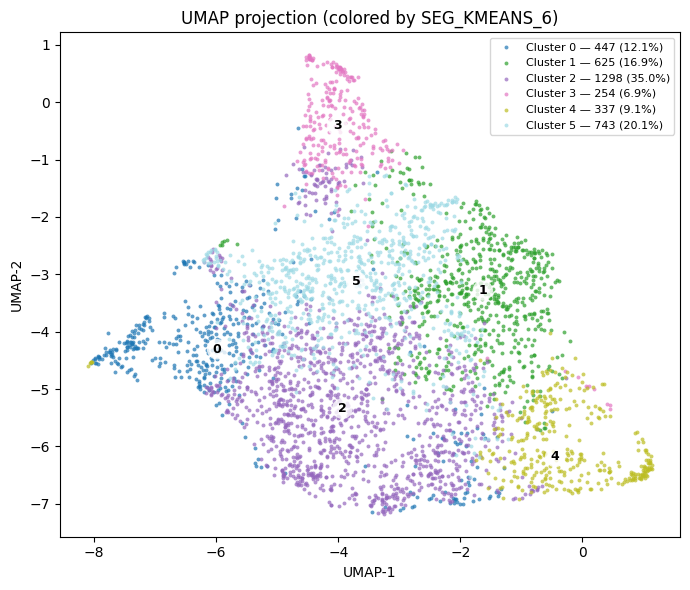

In [30]:
import umap


X_ = np.nan_to_num(X).astype('float32')
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_)

seg_col = f"SEG_KMEANS_{best['k']}"
labels = data_km[seg_col].values
uniq = np.unique(labels)

counts = pd.Series(labels).value_counts().sort_index()
total = int(counts.sum())
cmap = plt.get_cmap('tab20', len(uniq))

plt.figure(figsize=(7, 6))
for idx, cl in enumerate(uniq):
    mask = labels == cl
    plt.scatter(
        X_umap[mask, 0], X_umap[mask, 1],
        s=8, alpha=0.7, linewidths=0,
        color=cmap(idx),
        label=f"Cluster {cl} — {counts.loc[cl]} ({counts.loc[cl]/total*100:.1f}%)"
    )

for cl in uniq:
    m = labels == cl
    if m.sum() == 0: 
        continue
    x_m, y_m = np.median(X_umap[m, 0]), np.median(X_umap[m, 1])
    plt.text(
        x_m, y_m, str(cl),
        fontsize=9, weight='bold', ha='center', va='center',
        bbox=dict(boxstyle='circle', fc='white', alpha=0.8, ec='none')
    )

plt.title(f"UMAP projection (colored by {seg_col})")
plt.xlabel("UMAP-1"); plt.ylabel("UMAP-2")
plt.legend(loc='best', frameon=True, fontsize=8)
plt.tight_layout()
plt.show()

All clasters are visible and +- located in different points.

## Quantiles (RFM)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype


candidates = [
    "sum_of_paym_months",   # Monetary
    "all_credits",          # Frequency
    "min_MnthAfterLoan",    # Recency
    "DTI"                   # Risk metric
]
rfm_cols = [c for c in candidates if c in data.columns]

invert_cols = [c for c in ["DTI", "min_MnthAfterLoan", "max_MnthAfterLoan"] if c in rfm_cols]


weights = {c: 1.0 for c in rfm_cols}

for c in ["sum_of_paym_months", "all_credits"]:
    if c in weights:
        weights[c] = 1.5


rfm_src = data[rfm_cols].apply(pd.to_numeric, errors="coerce").copy()
rfm_src = rfm_src.fillna(rfm_src.median())


def qbin_series(s: pd.Series, q=5, invert=False):
    r = s.rank(method="first")
    labels = [5,4,3,2,1] if invert else [1,2,3,4,5]
    return pd.qcut(r, q=q, labels=labels)

rfm_bins = {}
for col in rfm_cols:
    rfm_bins[col] = qbin_series(rfm_src[col], q=5, invert=(col in invert_cols)).astype(int)

rfm = pd.DataFrame(rfm_bins, index=data.index)

rfm["RFM_SCORE"] = sum(rfm[c] * weights[c] for c in rfm_cols)


rfm["RFM_TIER"] = pd.qcut(rfm["RFM_SCORE"].rank(method="first"), q=5, labels=[1,2,3,4,5]).astype(int)


tier_to_group = {5:"VIP", 4:"Core", 3:"Potential", 2:"At Risk", 1:"Hibernating"}
rfm["RFM_GROUP"] = rfm["RFM_TIER"].map(tier_to_group)


data_rfm = data.copy()
data_rfm["SEG_RFM_5"] = rfm["RFM_TIER"]
data_rfm["RFM_GROUP"] = rfm["RFM_GROUP"]

sizes = data_rfm["RFM_GROUP"].value_counts().sort_index()
share = (sizes / sizes.sum() * 100).round(2)
print(pd.DataFrame({"group": sizes.index, "count": sizes.values, "share_%": share.values}))


         group  count  share_%
0      At Risk    741    20.01
1         Core    741    20.01
2  Hibernating    741    20.01
3    Potential    740    19.98
4          VIP    741    20.01


Split is equal

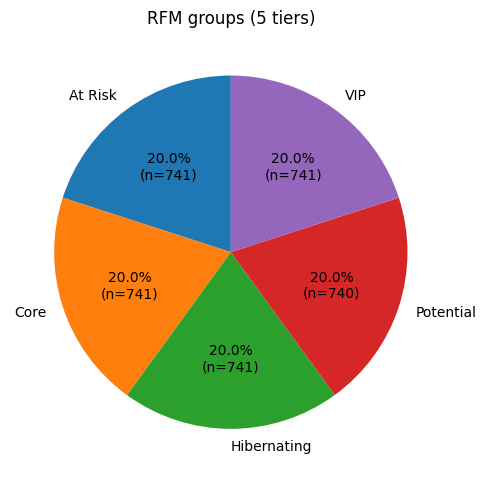

In [36]:
def autopct_count(pct):
    total = sizes.sum()
    count = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n(n={count})"

plt.figure(figsize=(5,5))
plt.pie(sizes.values, labels=sizes.index, autopct=autopct_count, startangle=90)
plt.title("RFM groups (5 tiers)")
plt.tight_layout()
plt.show()

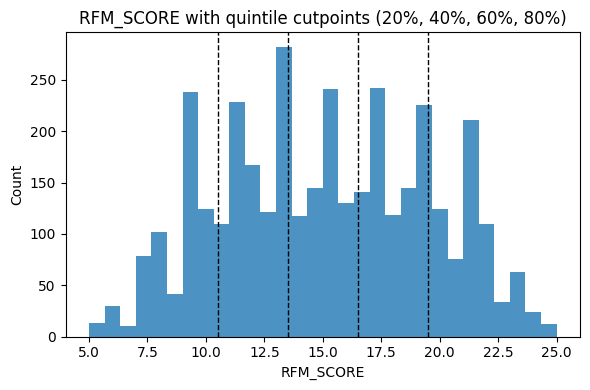

In [37]:
qs = np.quantile(rfm["RFM_SCORE"], [0.2, 0.4, 0.6, 0.8])
plt.figure(figsize=(6,4))
plt.hist(rfm["RFM_SCORE"], bins=30, alpha=0.8)
for qv in qs:
    plt.axvline(qv, color="k", linestyle="--", linewidth=1)
plt.title("RFM_SCORE with quintile cutpoints (20%, 40%, 60%, 80%)")
plt.xlabel("RFM_SCORE"); plt.ylabel("Count")
plt.tight_layout()
plt.show()

So we have 5 equal and transparent segments

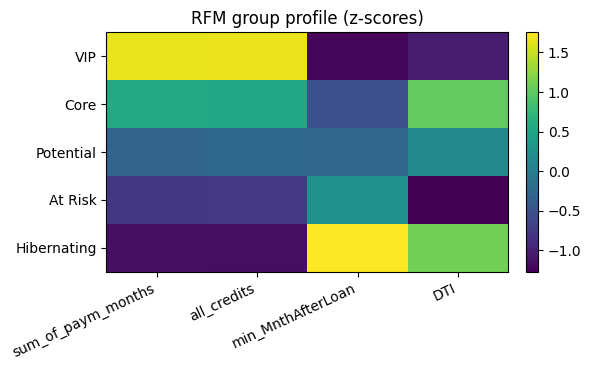

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

order = ["VIP","Core","Potential","At Risk","Hibernating"]
prof = data_rfm.groupby("RFM_GROUP")[rfm_cols].mean().reindex(order)

Z = (prof - prof.mean()) / prof.std(ddof=0)

plt.figure(figsize=(6, 3.8))
im = plt.imshow(Z.values, aspect="auto")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(rfm_cols)), rfm_cols, rotation=25, ha="right")
plt.yticks(range(len(order)), order)
plt.title("RFM group profile (z-scores)")
plt.tight_layout()
plt.show()


# Task 4 - user profiles

In [ ]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

seg_col_km = f"SEG_KMEANS_{best['k']}"
num_cols_km = [c for c in ["DTI","age","sum_of_paym_months","all_credits","min_MnthAfterLoan"] if c in data_km.columns]


_base_categorical
ohe_prefixes = [p for p in _base_categorical if any(col.startswith(p + "_") for col in data_km.columns)]




sizes = data_km[seg_col_km].value_counts().sort_index()
share = (sizes / sizes.sum() * 100).round(2)
km_profile_num = data_km.groupby(seg_col_km)[num_cols_km].mean().round(2)
km_profile = pd.concat([sizes.rename("count"), share.rename("share_%"), km_profile_num], axis=1)
print("K-Means cluster profile (size + numerics):")
print(km_profile)


def top_diffs_by_cluster(data_in, seg_col, cols, topn=3):
    out = {}
    mu = data_in[cols].mean()
    sd = data_in[cols].std(ddof=0).replace(0, np.nan)
    for cl, g in data_in.groupby(seg_col):
        z = (g[cols].mean() - mu) / sd
        z = z.sort_values(key=lambda s: s.abs(), ascending=False).dropna().head(topn)
        out[int(cl)] = z.round(2)
    return out

km_topdiffs = top_diffs_by_cluster(data_km, seg_col_km, num_cols_km, topn=3)
print("\nTop numeric differentiators per cluster (z-score vs overall):")
for cl, s in km_topdiffs.items():
    print(f"Cluster {cl}:")
    print(s.to_string())


def top_ohe_categories(data_in, seg_col, prefix, topn=2, min_share=0.1):
    cols = [c for c in data_in.columns if c.startswith(prefix + "_") and is_numeric_dtype(data_in[c])]
    if not cols:
        return pd.DataFrame()

    share_tbl = data_in.groupby(seg_col)[cols].mean()

    tops = {}
    for cl, row in share_tbl.iterrows():
        sub = row.sort_values(ascending=False)
        sub = sub[sub >= min_share].head(topn)
        tops[int(cl)] = [f"{k.replace(prefix+'_','')}: {v:.0%}" for k, v in sub.items()]
    return tops

km_topcats = {}
for pref in ohe_prefixes:
    tops = top_ohe_categories(data_km, seg_col_km, pref, topn=2, min_share=0.15)
    if tops:
        km_topcats[pref] = tops

print("\nTop OHE categories per prefix (only shares ≥15%):")
for pref, d in km_topcats.items():
    print(f"[{pref}]")
    for cl, lst in d.items():
        print(f"  Cluster {cl}: {', '.join(lst)}")


K-Means cluster profile (size + numerics):
              count  share_%   DTI    age  sum_of_paym_months  all_credits  \
SEG_KMEANS_6                                                                 
0               447    12.07  0.32  37.71               45.12         2.52   
1               625    16.87  0.45  37.56              171.88        11.87   
2              1298    35.04  0.41  33.93               43.06         3.50   
3               254     6.86  0.38  34.25               52.17         4.43   
4               337     9.10  0.42  34.43               76.12         5.91   
5               743    20.06  0.35  37.52               95.83         6.26   

              min_MnthAfterLoan  
SEG_KMEANS_6                     
0                         40.69  
1                          6.57  
2                          9.79  
3                         18.86  
4                         10.85  
5                         12.22  

Top numeric differentiators per cluster (z-score vs overall

0) Hibernating – low DTI, rarely take loans, small amounts, older (38 yrs), inactive for long (~41 mo)
1) Heavy users / Risky – very frequent borrowers (≈12 loans), high loan volume, fresh clients (~7 mo), high DTI
2) Mass market – average DTI, young (~34 yrs), low value and frequency, standard loan purposes (repairs)
3) Default-prone – low value, old loans (≈19 mo), all have delays (30/60/90 days), moderate DTI
4) Growing core – medium value (≈76 mo), moderate DTI, active (≈11 mo), balanced risk
5) Reliable core – good payment history, solid loan activity (~6 loans), average age, low DTI, stable and loyal

In [43]:
group_col = "RFM_GROUP"
rfm_cols_show = [c for c in ["sum_of_paym_months","all_credits","min_MnthAfterLoan","DTI"] if c in data_rfm.columns]

sizes_r = data_rfm[group_col].value_counts().sort_index()
share_r = (sizes_r / sizes_r.sum() * 100).round(2)

rfm_profile = data_rfm.groupby(group_col)[rfm_cols_show].mean().round(2)
rfm_profile = pd.concat([sizes_r.rename("count"), share_r.rename("share_%"), rfm_profile], axis=1)
print("RFM group profile:")
print(rfm_profile)

mu = data_rfm[rfm_cols_show].mean()
sd = data_rfm[rfm_cols_show].std(ddof=0).replace(0, np.nan)
rfm_z = (data_rfm.groupby(group_col)[rfm_cols_show].mean() - mu) / sd

print("\n— Интерпретация RFM-групп (шаблон):")
labels_map = {
    "sum_of_paym_months":"Value", 
    "all_credits":"Frequency",
    "min_MnthAfterLoan":"Recency(↓ лучше)", 
    "DTI":"Risk(↓ лучше)"
}


RFM group profile:
             count  share_%  sum_of_paym_months  all_credits  \
RFM_GROUP                                                      
At Risk        741    20.01               39.89         3.11   
Core           741    20.01              108.44         7.29   
Hibernating    741    20.01               21.46         1.83   
Potential      740    19.98               64.42         4.80   
VIP            741    20.01              162.08        11.11   

             min_MnthAfterLoan   DTI  
RFM_GROUP                             
At Risk                  15.99  0.38  
Core                     10.66  0.41  
Hibernating              25.90  0.41  
Potential                12.38  0.40  
VIP                       6.00  0.38  

— Интерпретация RFM-групп (шаблон):
At Risk — n=741 (20.0%)
  • Профиль: Value ↓ (-0.57σ), Frequency ↓ (-0.62σ), Recency(↓ лучше) ↓ (+0.12σ), Risk(↓ лучше) ↑ (-0.14σ)
  • Интерпретация: [1 фраза — кто это: VIP/Core/Potential/At Risk/Hibernating]
  • Действия

Client profiles:

0) VIP – highest value and frequency, most recent activity (~6 mo), low DTI so top loyal customers

1) Core – high value (108 mo), 7 loans, recent (~11 mo), moderate DTI so stable reliable clients

2) Potential – medium value (64 mo), 5 loans, fairly recent (~12 mo), average risk so growing customers

3) At Risk – lower value (40 mo), 3 loans, older engagement (~16 mo), slightly declining activity

4) Hibernating – lowest value (21 mo), rarely borrow (~2 loans), inactive for long (~26 mo), average DTI